In [175]:
# coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
'''
# pd.Timestamp('20100104130500.0')  # 无法解析为时间 需要进行解析转换
'''
# 加载数据
df = pd.read_csv('data/DQC00-5m-2010-2021.txt',
                 sep=',',
                 # nrows=3000,
                 index_col=['datetime'],  # 设置行索引
                 parse_dates=['datetime'],  # 解析时间 20100104130500.0
                 date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S.%f'),  # 时间解析的格式，进行毫秒级数据解析
                 usecols=['datetime', 'open', 'high', 'low', 'close', 'volume'],  # 设置需要用到的列
                 encoding='utf-8',
                 float_precision='round_trip',  # 所有数据会当做string读取, 使用时再进行相应的转换为float
                 )
# pd.reset_option('display.float_format')  # 重置
pd.set_option('precision', 2)  # 显示小数点后的位数
pd.set_option('display.max_rows', 300)  # 控制显示的最大行数
pd.set_option('display.min_rows', 20)  # 确定显示的部分有多少行
# pd.set_option('display.float_format',  '{:,.2f}'.format) # 数字格式化显示 用逗号格式化大值数字 设置数字精度
# 指定列名设置计算精确度，未指定的保持原样
df.round({'open':0, 'high':0, 'low':0, 'close':0 })
# 统一保持1位小数
df.round(0)

print(df.dtypes)
df

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


,open,high,low,close,volume
datetime,,,,,
2010-01-04 13:05:00,1845.16,1846.14,1842.21,1844.18,2421.0
2010-01-04 13:10:00,1844.18,1847.12,1843.19,1846.14,3321.0
2010-01-04 13:15:00,1846.14,1855.97,1846.14,1850.07,5369.0
2010-01-04 13:20:00,1850.07,1852.04,1850.07,1851.05,1412.0
2010-01-04 13:25:00,1852.04,1853.02,1850.07,1852.04,3291.0
2010-01-04 13:30:00,1852.04,1854.00,1851.05,1853.02,1663.0
2010-01-04 13:35:00,1852.04,1853.02,1851.05,1852.04,1010.0
2010-01-04 13:40:00,1852.04,1852.04,1850.07,1851.05,1045.0
2010-01-04 13:45:00,1851.05,1854.98,1850.07,1854.00,3299.0


In [177]:
# 将DATE设定为index
# df.set_index('datetime', inplace=True)

# # 周期转换方法：resample
# rule_type = '60T'  # rule='5T'：意思是5分钟，意味着转变为5分钟数据
# period_df = df[['close']].resample(rule=rule_type).last()  # last：取这5分钟的最后一行数据
#
# # 开、高、低的价格，成交量
# period_df['open'] = df['open'].resample(rule=rule_type).first()
# period_df['high'] = df['high'].resample(rule=rule_type).max()
# period_df['low'] = df['low'].resample(rule=rule_type).min()
# period_df['volume'] = df['volume'].resample(rule=rule_type).sum()
# period_df = period_df[['open','high','low','close','volume']]
# # period_df

In [178]:
# rolling是第几个5天的值，mean()取均值
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(60).mean()
df['ma5'] = ma5
df['ma30'] = ma30
df.shape

(114515, 7)

<class 'pandas.core.frame.DataFrame'>
ma5      float64
ma30     float64
close    float64
dtype: object


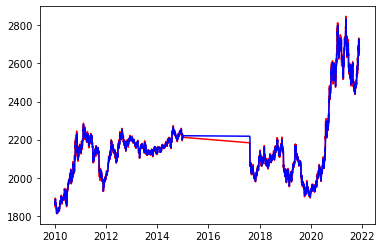

In [179]:
# 展示数据图
plt.plot(df.index,df['ma5'],c='red')
plt.plot(df.index,df['ma30'],c='blue')

ma = df[['ma5', 'ma30', 'close']]
print(type(ma))
print(ma.dtypes)

In [180]:

# True：短期均线 低于 长期均线
# False：短期均线 高于 长期均线
# True ---> False 的过渡，对应的点是金叉
# False ---> True 的过渡，对应的点是死叉

down = ma5 < ma30
up = ma5 > ma30
# 短期均线下穿长期均线
death_cross = df.loc[(down & (up.shift(1) | up.shift(2)) & ~(down.shift(1) | down.shift(2)))].index
# 展示均线死叉的点
# df.loc[death_cross,['ma5','ma30']].head(20)

In [181]:
df2 = df.loc[death_cross,['ma5','ma30']]
df2.shape

(1714, 2)

In [182]:
# 短期无线上穿长期均线
golden_cross = df.loc[(up & (down.shift(1) | down.shift(2)) & ~(up.shift(1) | up.shift(2)))].index
# 展示均线金叉的点
# df.loc[golden_cross,['ma5','ma30']].head(20)

In [183]:
df2 = df.loc[golden_cross,['ma5','ma30']]
df2.shape

(1703, 2)

In [184]:
pd.set_option('display.min_rows', 300)  # 确定显示的部分有多少行
# pd.set_option('display.min_rows', 20)  # 确定显示的部分有多少行
df[['ma5', 'ma30', 'close']]

,ma5,ma30,close
datetime,,,
2010-01-04 13:05:00,NaN,NaN,1844.18
2010-01-04 13:10:00,NaN,NaN,1846.14
2010-01-04 13:15:00,NaN,NaN,1850.07
2010-01-04 13:20:00,NaN,NaN,1851.05
2010-01-04 13:25:00,1848.69,NaN,1852.04
2010-01-04 13:30:00,1850.46,NaN,1853.02
2010-01-04 13:35:00,1851.64,NaN,1852.04
2010-01-04 13:40:00,1851.84,NaN,1851.05
2010-01-04 13:45:00,1852.43,NaN,1854.00


In [185]:
# df.loc[~(down | up.shift(1))]['flag'] = -1

df.loc[death_cross, 'flag'] = -1
df.loc[golden_cross, 'flag'] = 1
# df.loc[death_cross].iloc[30:]